In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as pl
from matplotlib.colors import LogNorm
from matplotlib import rcParams
import numpy as np
import tables
import os

from src import this_project as P
from src import core as cr

In [5]:
params = {
    'backend': 'pdf',
    'axes.labelsize': 8,
    'axes.titlesize': 8,
    'font.size': 8,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'font.family': 'serif',
    'figure.dpi': 300,
    'image.cmap': 'viridis'
}

rcParams.update(params)

# Load data

### HI data

In [6]:
with tables.open_file(os.path.join(P.BASEPATH, 'survey2pytable/data/HI4PI.h5')) as hi_store:
    nhi = hi_store.root.mom0[:,0]

/Users/dlenz/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


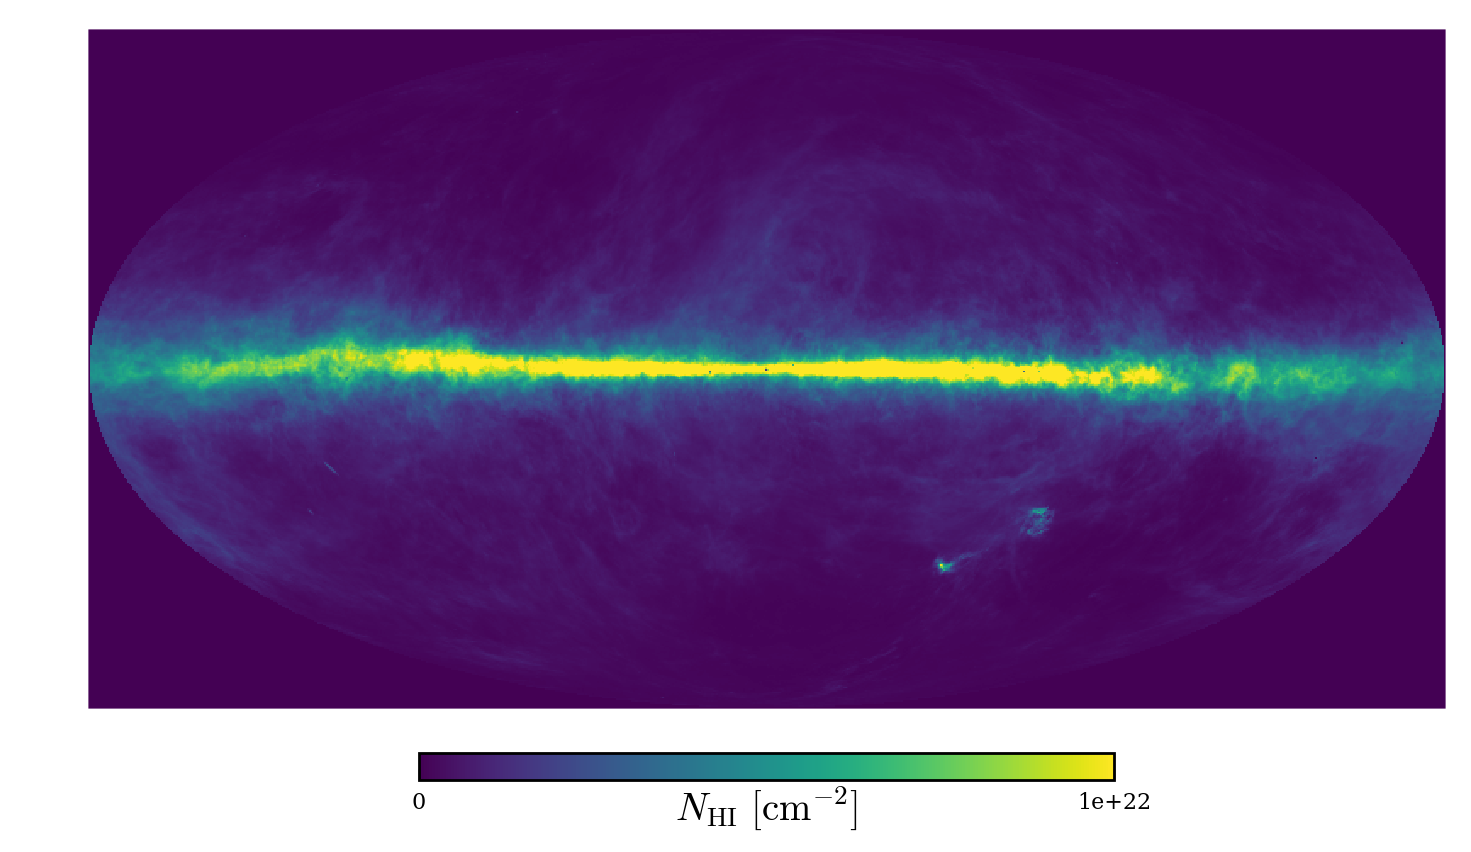

In [7]:
fig = pl.figure(figsize=P.FIGSIZE_2COL, num=1)
hp.mollview(nhi, cmap='viridis', min=0., max=1.e22, fig=1, title='', unit=r'$N_{\rm HI}\ [\rm cm^{-2}]$')

### Gaussian decomposition

In [8]:
store = tables.open_file(os.path.join(P.PROJECTPATH, 'data/gdec_2July.h5'))
table = store.root.gaussdec

In [9]:
table.dtype

dtype([('amplitude', '<f4'), ('center_c', '<f4'), ('center_kms', '<f4'), ('glat', '<f4'), ('glon', '<f4'), ('hpxindex', '<i4'), ('sigma_c', '<f4'), ('sigma_kms', '<f4')])

In [20]:
amps = table.cols.amplitude[:]
v_centre = table.cols.center_kms[:]
sigmas = table.cols.sigma_kms[:]

### Extract model values and its fitted parameters

In [11]:
model = cr.reconstruct_coldens(table)

/Users/dlenz/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


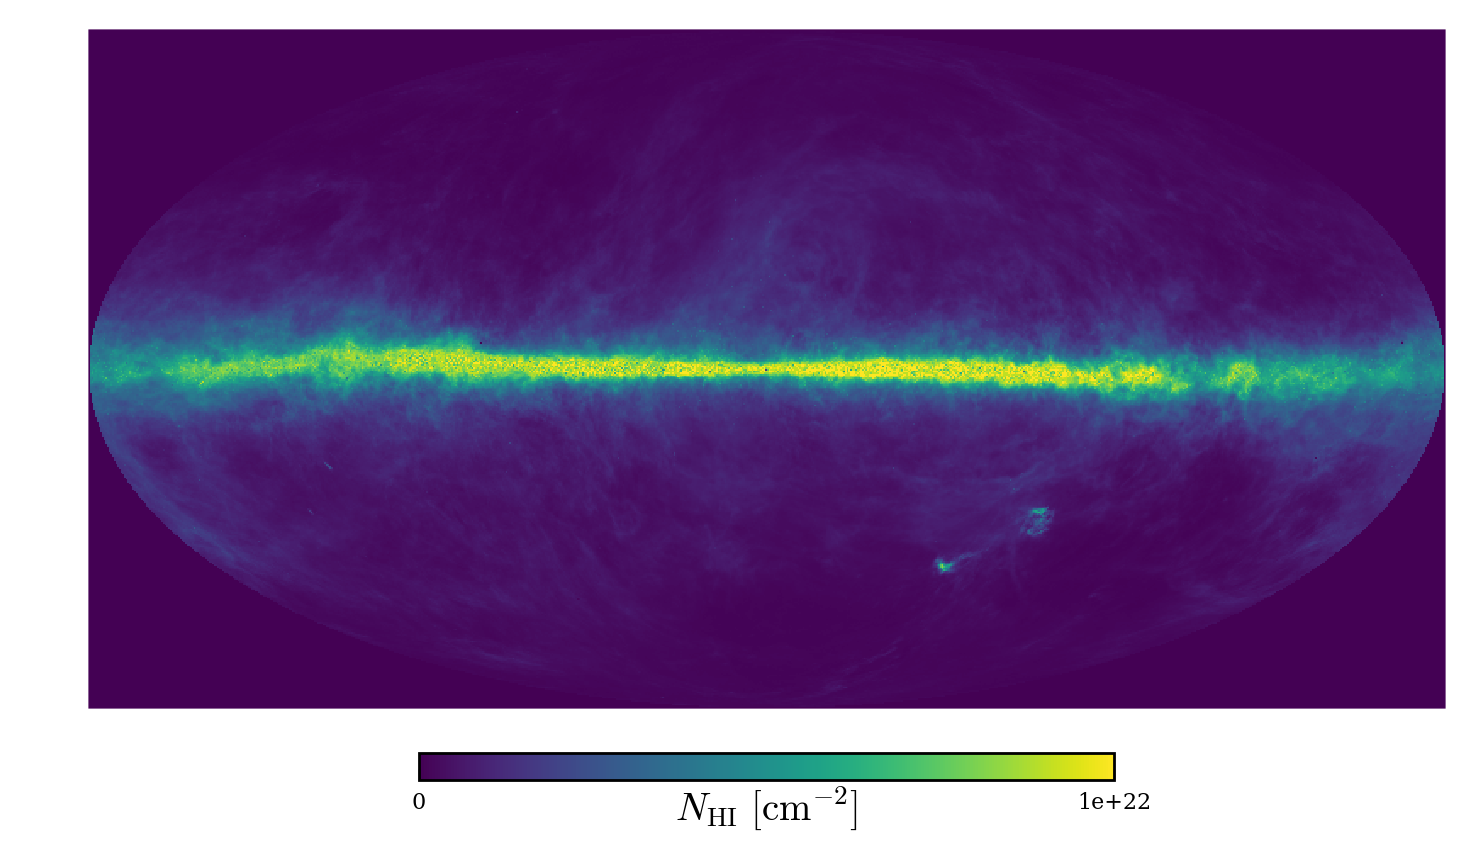

In [12]:
fig = pl.figure(figsize=P.FIGSIZE_2COL, num=1)
hp.mollview(model, cmap='viridis', min=0., max=1.e22, fig=1, title='', unit=r'$N_{\rm HI}\ [\rm cm^{-2}]$')

### Residual

In [13]:
residual = nhi - model

/Users/dlenz/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


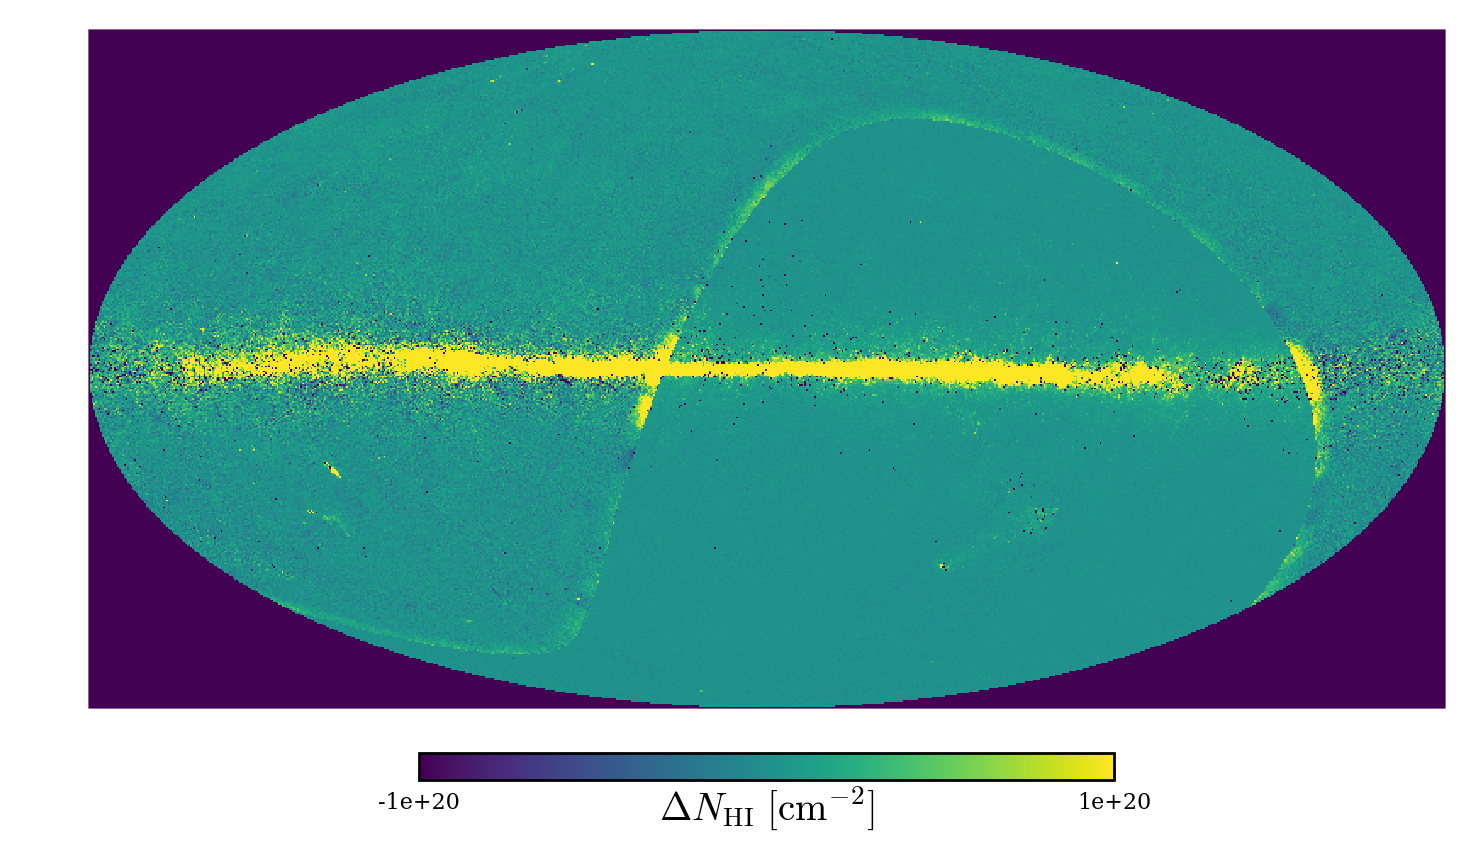

In [14]:
fig = pl.figure(figsize=P.FIGSIZE_2COL, num=1)
hp.mollview(residual, cmap='viridis', min=-1e20, max=1.e20, fig=1, title='', unit=r'$\Delta N_{\rm HI}\ [\rm cm^{-2}]$')

### Number of components

In [15]:
n_comps = np.load('data/n_comps.npy')

/Users/dlenz/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


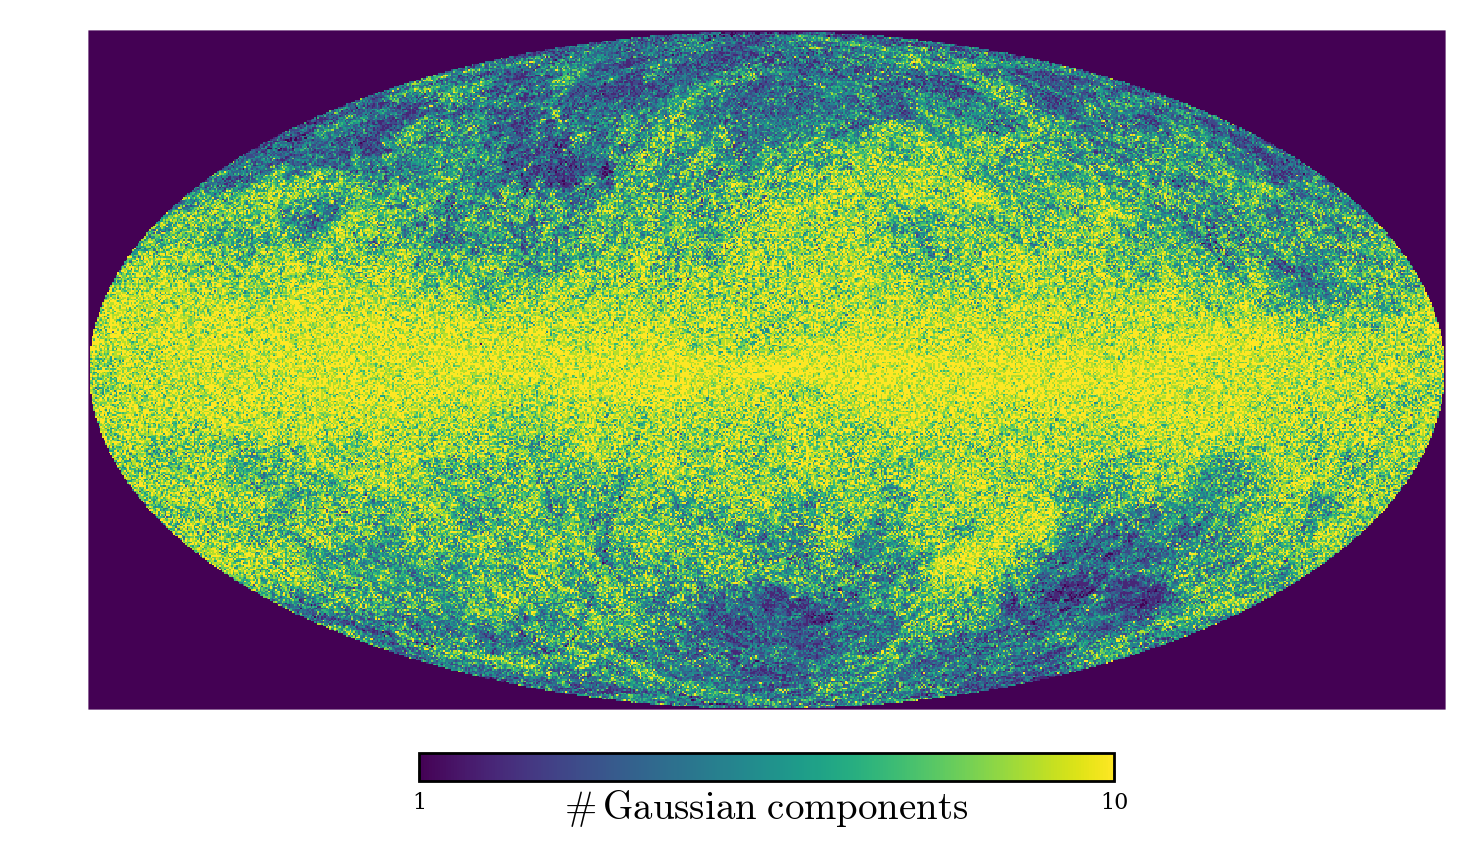

In [16]:
fig = pl.figure(figsize=P.FIGSIZE_2COL, num=1)
hp.mollview(n_comps, cmap='viridis', fig=1, title='', unit=r'$\#\,\rm Gaussian\ components$')

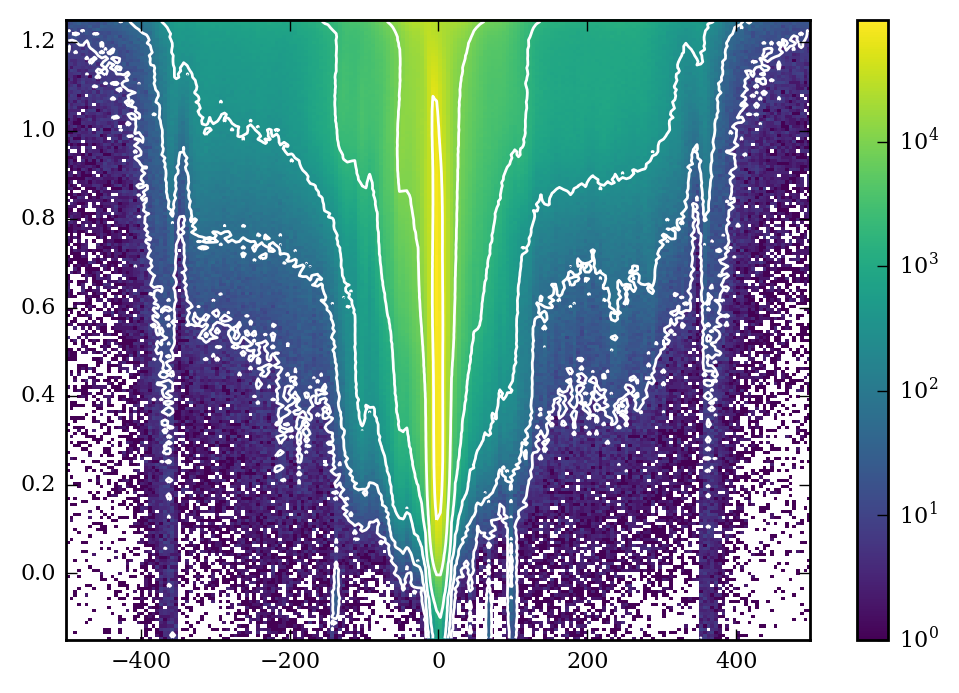

In [17]:
counts, xbins, ybins, image = pl.hist2d(v_centre, np.log10(sigmas),
              bins=200,
#               cmin=1,
              range=[[-500., 500.],[-0.15, 1.25]],
              cmap='viridis',
              norm=LogNorm())
pl.colorbar(image)

pl.contour(
    counts.T,
    extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
    levels=10**np.arange(1., 5., 0.75), 
    origin='lower',
    colors='white')

## Generate 2D histograms

In [18]:
counts, xbins, ybins = np.histogram2d(v_centre, np.log10(sigmas),
              bins=200,
              range=[[-600., 600.],[-0.15, 1.25]])

/Users/dlenz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


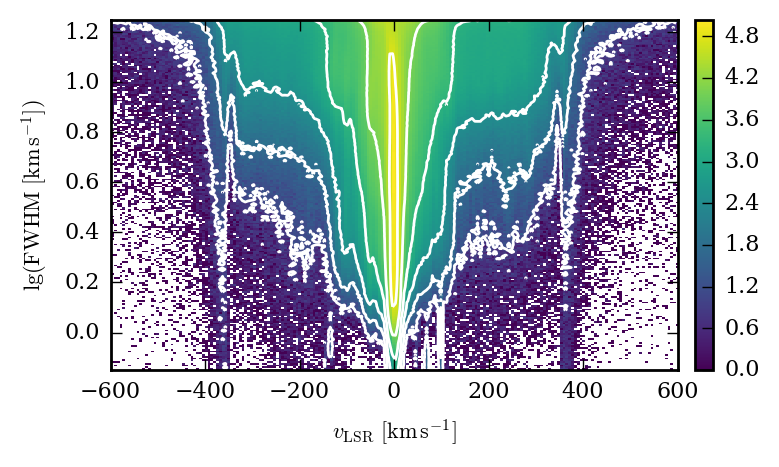

In [19]:
fig = pl.figure(figsize=P.FIGSIZE_1COL)
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))
cax = fig.add_axes((0.925, 0.1, 0.025, 0.8))

im = ax.imshow(np.log10(counts.T),
    extent=[xbins.min(), xbins.max(),ybins.min(),ybins.max()],
    origin='lower',
    aspect='auto',
    cmap='viridis',
    interpolation='nearest')

pl.colorbar(im, cax=cax)

ax.contour(
    counts.T,
    extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
    levels=P.CONTLEVELS,
    origin='lower',
    colors='w')

ax.set_xlabel(r'$v_{\rm LSR}\ [\rm km\,s^{-1}]$')
ax.set_ylabel(r'$\rm lg(FWHM\ [\rm km\,s^{-1}])$')

In [ ]:
counts, xbins, ybins = np.histogram2d(np.log10(amps*P.cK2nh), np.log10(sigmas),
              bins=200,
              range=[[18., 21.],[0.15, 1.25]])

In [ ]:
fig = pl.figure(figsize=P.FIGSIZE_1COL)
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))
cax = fig.add_axes((0.925, 0.1, 0.025, 0.8))

im = ax.imshow(np.log10(counts.T),
    extent=[xbins.min(), xbins.max(),ybins.min(),ybins.max()],
    origin='lower',
    aspect='auto',
    cmap='viridis',
    interpolation='nearest')

pl.colorbar(im, cax=cax)

ax.contour(
    counts.T,
    extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],
    levels=P.CONTLEVELS,
    origin='lower',
    colors='w')

ax.set_xlabel(r'$N_{\rm HI}\ [\rm cm^{-2}]$')
ax.set_ylabel(r'$\rm lg(FWHM\ [\rm km\,s^{-1}])$')

/Users/dlenz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
